In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(most_recent_date)


('2017-08-23',)


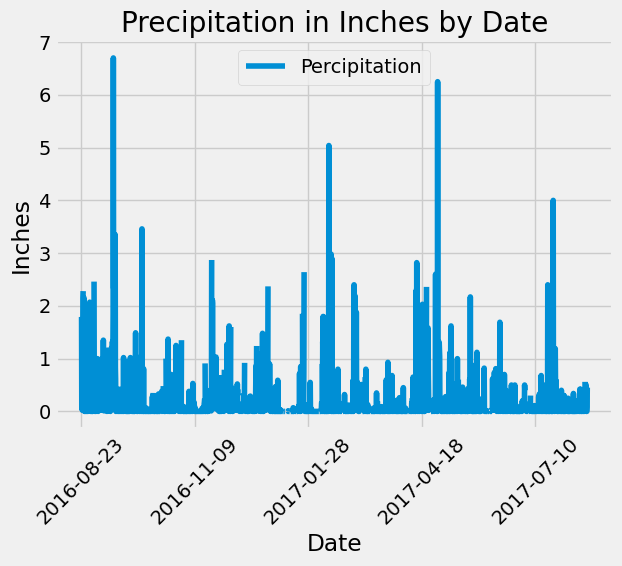

In [76]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# change to datetime datatype
most_recent_date_str = most_recent_date[0]
most_recent_date_obj = dt.datetime.strptime(most_recent_date_str, "%Y-%m-%d").date()
one_year_ago = (most_recent_date_obj - dt.timedelta(days=365))
# print(one_year_ago)

# Perform a query to retrieve the data (date) and precipitation scores (prcp)
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
# print(prcp_data)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_data_df = pd.DataFrame(prcp_data, columns= ['Date', 'Percipitation'])
prcp_data_df.set_index(prcp_data_df['Date'], inplace=True)

# Sort the dataframe by date
sorted_prcp_data = prcp_data_df.sort_index()
# print(sorted_prcp_data)

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_data.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation in Inches by Date')
plt.xticks(rotation=45)
plt.show()

In [81]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp_data.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [86]:
# Design a query to calculate the total number of stations in the dataset
# num_stations = session.query(Station.station).count()
# num_stations

num_stations = session.query(Measurement.station).distinct().count()
num_stations

9

In [100]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [116]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(most_active)

[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 0, 'Temperature')

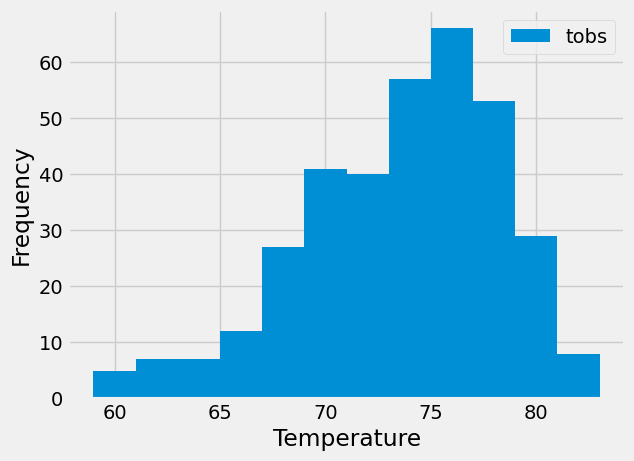

In [136]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_ago).all()
# print(results)

# make dataframe with results
active_station_temps_df = pd.DataFrame(results, columns=['tobs'])
# active_station_temps_df

# plot histogram
# plt.hist(active_station_temps_df, bins=12)
active_station_temps_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [137]:
# Close Session
session.close()